#   Can Americans Escape Gun Violence?
Over the last few years, the on-going debate about gun control in America has raged following terrible massacres across the country. While there are plenty of opinions on this subject, the reality now is that it seems unlikely that laws regarding gun control will be changed any time soon. With that in mind, practically speaking, are there places in America that are safer than others when it comes to gun violence? What are some of the factors of gun violence in America? What other conclusions can we draw from researching data on gun violence? In this paper, I hope to explore these different aspects to hopefully answer: 
Where are we safe?

In order to answer these questions, we will be investigating a CSV of gun violence data from 2013 through 2018 downloaded from Kaggle.com. This dataframe includes lots of important information on every violent gun incident, including, the date, the location, the number of people killed or injured, a source URL for the incident, and the number of guns involved, amongst other statistics. This data can help narrow down what areas of the USA are potentially safer than others.

In [27]:
# To start, we begin by importing the numpy, pandas, matplotlib, and scipy toolkits for our database
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
from scipy.stats import ttest_ind

In [28]:
# Next we import our dataframe that was downloaded from Kaggle
df = pd.read_csv('gun-violence-data_01-2013_03-2018.csv/gun-violence-data_01-2013_03-2018.csv', delimiter = ',')
df

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0
5,478948,2013-01-07,Oklahoma,Tulsa,6000 block of South Owasso,4,0,http://www.gunviolencearchive.org/incident/478948,http://usnews.nbcnews.com/_news/2013/01/07/163...,False,...,0::23||1::23||2::33||3::55,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Female||2::Female||3::Female||4:...,0::Rebeika Powell||1::Kayetie Melchor||2::Mist...,NaN,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.kjrh.com/news/local-news/4-found-sh...,72.0,11.0
6,479363,2013-01-19,New Mexico,Albuquerque,2806 Long Lane,5,0,http://www.gunviolencearchive.org/incident/479363,http://hinterlandgazette.com/2013/01/pastor-gr...,False,...,0::51||1::40||2::9||3::5||4::2||5::15,0::Adult 18+||1::Adult 18+||2::Child 0-11||3::...,0::Male||1::Female||2::Male||3::Female||4::Fem...,0::Greg Griego||1::Sara Griego||2::Zephania Gr...,5::Family,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.cbsnews.com/news/nehemiah-gringo-ca...,10.0,14.0
7,479374,2013-01-21,Louisiana,New Orleans,LaSalle Street and Martin Luther King Jr. Boul...,0,5,http://www.gunviolencearchive.org/incident/479374,http://www.nola.com/crime/index.ssf/2013/01/no...,False,...,NaN,NaN,0:

In [29]:
#Before continuing with our Dataframe, we're going to clean it up, add some rows that will provide us with crucial information,
#and edit some rows in order to make them more accessible.

#Convert the column "date" into a datetime object.
df['date'] = pd.to_datetime(df['date'], errors = 'coerce')
# Add 4 columns each as a combination based on n_killed and n_injured.
#safe_incident keeps count of every time there is a gun crime that results in no injuries or deaths
df['safe_incident'] = np.where((df['n_injured'] == 0) & (df['n_killed'] == 0), 1,np.nan)
#death_only records all the incidents where the victims only died
df['death_only'] = np.where((df['n_injured'] == 0) & (df['n_killed'] > 0), 1,np.nan)
#injury_only records all the incidents where the victims were only injured
df['injury_only'] = np.where((df['n_injured'] > 0) & (df['n_killed'] == 0), 1,np.nan)
#death_and_injury records all the incidents where there were both fatal and nonfatal injuries
df['death_and_injury'] = np.where((df['n_injured'] > 0) & (df['n_killed'] > 0), 1,np.nan)

df

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district,safe_incident,death_only,injury_only,death_and_injury
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN,NaN,NaN,1.0,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0,NaN,NaN,NaN,1.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0,NaN,NaN,NaN,1.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0,NaN,1.0,NaN,NaN
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0,NaN,NaN,NaN,1.0
5,478948,2013-01-07,Oklahoma,Tulsa,6000 block of South Owasso,4,0,http://www.gunviolencearchive.org/incident/478948,http://usnews.nbcnews.com/_news/2013/01/07/163...,False,...,NaN,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.kjrh.com/news/local-news/4-found-sh...,72.0,11.0,NaN,1.0,NaN,NaN
6,479363,2013-01-19,New Mexico,Albuquerque,2806 Long Lane,5,0,http://www.gunviolencearchive.org/incident/479363,http://hinterlandgazette.com/2013/01/pastor-gr...,False,...,5::Family,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.cbsnews.com/news/nehemiah-gringo-ca...,10.0,14.0,NaN,1.0,NaN,NaN
7,479374,2013-01-21,Louisiana,New Orleans,LaSalle Street and Martin Luther King Jr. Boul...,0,5,http://www.gunviolencearchive.org/incident/479374,http://www.nola.com/crime/index.ssf/2013/01/no...,False,...,NaN,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.huffingtonpost.com/2013/01/21/new-o...,93.0,5.0,NaN,NaN,1.0,NaN
8,479389,2013-01-21,California,Brentwood,1100 block of Breton Drive,0,4,http://www.gunviolencearchive.org/incident/479389,http://sanfrancisco.cbslocal.com/2013/01/22/4-...,False,...,NaN,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.contracostatimes.com/ci_22426767/br...,11.0,7.0,NaN,NaN,1.0,NaN
9,492151,2013-01-23,Maryland,Baltimore,1500 block of W. Fayette St.,1,6,http://www.gunviolencearchive.org/incident/492151,http://www.abc2news.com/news/crime-checker/bal...,False,...,NaN,0::Killed||1::Injured||2::Injured||3::Injured|...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://articles.baltimoresun.com/2013-08-25/ne...,NaN,44.0,NaN,NaN,NaN,1.0


## Is There Actually a Safe Place?

Before investigating into any of our various questions, we have to consider one important point - does any of this data really matter? What information can we draw from this dataframe that will show that it is undeniably relevant? Well, if we utilize our newly altered "date" column, we can see a rather scary statistic:

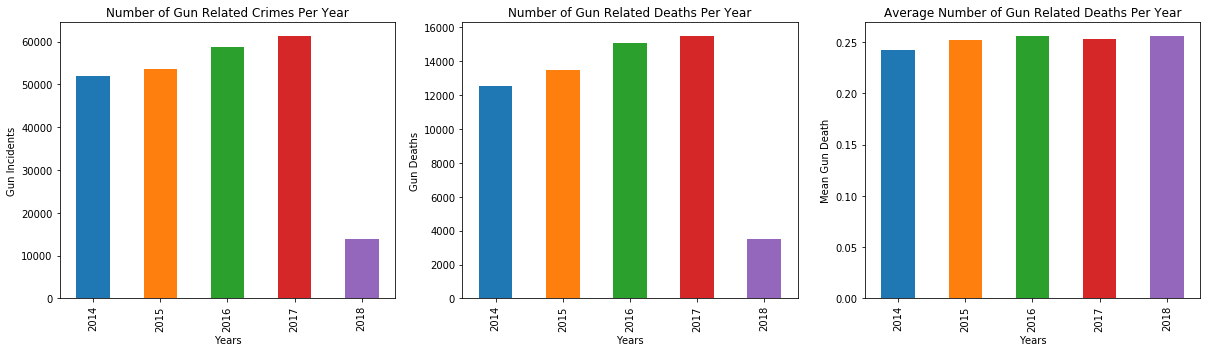

In [26]:
# Create a temporary dataframe that excludes the year 2013, since the total number of inputs seems to be
# disproportionate to the other years.
df_unskewed = df.loc[lambda df: df['date'].dt.year > 2013, :]

plt.figure(figsize=(17, 5))
plt.subplot(1, 3, 1)
df_unskewed.groupby(by=df_unskewed['date'].dt.year)['n_killed'].count().plot(kind = 'bar')
plt.xlabel('Years')
plt.ylabel('Gun Incidents')
plt.title('Number of Gun Related Crimes Per Year')


plt.subplot(1, 3, 2)
df_unskewed.groupby(by=df_unskewed['date'].dt.year)['n_killed'].sum().plot(kind = 'bar')
plt.xlabel('Years')
plt.ylabel('Gun Deaths')
plt.title('Number of Gun Related Deaths Per Year')

plt.subplot(1, 3, 3)
df_unskewed.groupby(by=df_unskewed['date'].dt.year)['n_killed'].mean().plot(kind = 'bar')
plt.xlabel('Years')
plt.ylabel('Mean Gun Death')
plt.title('Average Number of Gun Related Deaths Per Year')



plt.tight_layout()
plt.show()

Over the last 5 years, there seems to be a rise in gun incidents and deaths every year. This indicates that our safety can really be at risk, which begs the question - are there actually places in America where people are safer from gun violence? Well, it depends on how you look at the data, and it depends on how you define "safe". To begin, we can look at several different values to see if there are places that experience more or less violence than the national average. 

In [30]:
# here we print out the total number of violent incidents, the average number of deaths per incident, the average number of
# injuries per incident, the variance in deaths and injuries, and the standard deviation of deaths and injuries
print ("There were a total of " + str(df['n_killed'].count()) + " violent gun incidents in America over the last 5 years.")
print (str(df['safe_incident'].count()) + ' incidents resulted in no deaths or injuries.')
print (str(df['death_only'].count()) + ' incidents resulted in only fatalities.')
print (str(df['injury_only'].count()) + ' incidents resulted in only non-fatal injuries.')
print (str(df['death_and_injury'].count()) + ' incidents resulted in both deaths and injuries.')
print ("There were a total of " + str(df['n_killed'].sum()) + " gun deaths in America over the last 5 years.")
print ("On average, " + str(df['n_killed'].mean())[:5] + " people died per gun incident in America over the last 5 years.")
print ("There were a total of " + str(df['n_injured'].sum()) + " gun injuries in America over the last 5 years.")
print ("On average, " + str(df['n_injured'].mean())[:5] + " people were injured per gun incident in America over the last 5 years.")

print ("The variance of deaths per gun incident equals " + str(df['n_killed'].var())[:5])
print ("The standard deviation of deaths per gun incident equals " + str(df['n_killed'].std())[:5])

print ("The variance of injuries per gun incident equals " + str(df['n_injured'].var())[:5])
print ("The standard deviation of injuries per gun incident equals " + str(df['n_injured'].std())[:5])

There were a total of 239677 violent gun incidents in America over the last 5 years.
97287 incidents resulted in no deaths or injuries.
45200 incidents resulted in only fatalities.
88548 incidents resulted in only non-fatal injuries.
8642 incidents resulted in both deaths and injuries.
There were a total of 60468 gun deaths in America over the last 5 years.
On average, 0.252 people died per gun incident in America over the last 5 years.
There were a total of 118402 gun injuries in America over the last 5 years.
On average, 0.494 people were injured per gun incident in America over the last 5 years.
The variance of deaths per gun incident equals 0.272
The standard deviation of deaths per gun incident equals 0.521
The variance of injuries per gun incident equals 0.532
The standard deviation of injuries per gun incident equals 0.729


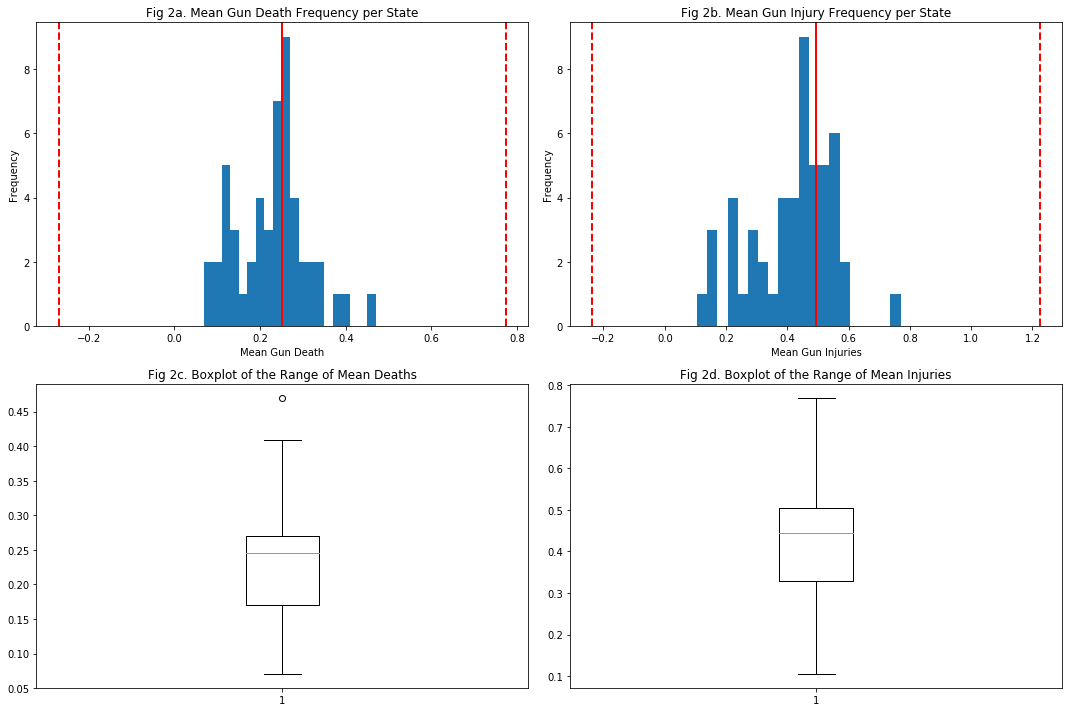

In [37]:
#Let's now compare the mean and standard deviations of our deaths and injuries to the mean of each state.
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
df.groupby('state')['n_killed'].mean().plot(kind = 'hist', bins = 20)
plt.axvline(df['n_killed'].mean(), color='r', linestyle='solid', linewidth=2)
plt.axvline(df['n_killed'].mean() + df['n_killed'].std(), color='r', linestyle='dashed', linewidth=2)
plt.axvline(df['n_killed'].mean()- df['n_killed'].std(), color='r', linestyle='dashed', linewidth=2)
plt.title('Fig 2a. Mean Gun Death Frequency per State')
plt.xlabel('Mean Gun Death')


plt.subplot(2, 2, 2)
df.groupby('state')['n_injured'].mean().plot(kind = 'hist', bins = 20)
plt.axvline(df['n_injured'].mean(), color='r', linestyle='solid', linewidth=2)
plt.axvline(df['n_injured'].mean() + df['n_injured'].std(), color='r', linestyle='dashed', linewidth=2)
plt.axvline(df['n_injured'].mean()- df['n_injured'].std(), color='r', linestyle='dashed', linewidth=2)
plt.title('Fig 2b. Mean Gun Injury Frequency per State')
plt.xlabel('Mean Gun Injuries')

plt.subplot(2, 2, 3)
plt.boxplot(df.groupby('state')['n_killed'].mean())
plt.title('Fig 2c. Boxplot of the Range of Mean Deaths')

plt.subplot(2, 2, 4)
plt.boxplot(df.groupby('state')['n_injured'].mean())
plt.title('Fig 2d. Boxplot of the Range of Mean Injuries')

plt.tight_layout()
plt.show()

As we can see, the figures above paint a very distinct picture when it comes to gun deaths and injuries. As we saw above, there is a large variance in regards to deaths and injuries within our sample size. This indicates that there are potential locations that might experience more gun incidents than other locations. However, Figures 2a - 2d indicate that there is not so much variance when it comes to individual states, seeing as every state is within one standard deviation of both mean death and injury rates, and there is only one outlier when it comes to mean gun deaths. If that is the case, then it would seem that there are only slightly safer places than others, as opposed to a definitive "safe place". On the other hand, it could be argued that given our large variance and standard deviation, states with a lower mean for their gun death rates could be significantly safer. So lets investigate the 50 states, so we can create a better picture for ourselves in regards to gun violence. 

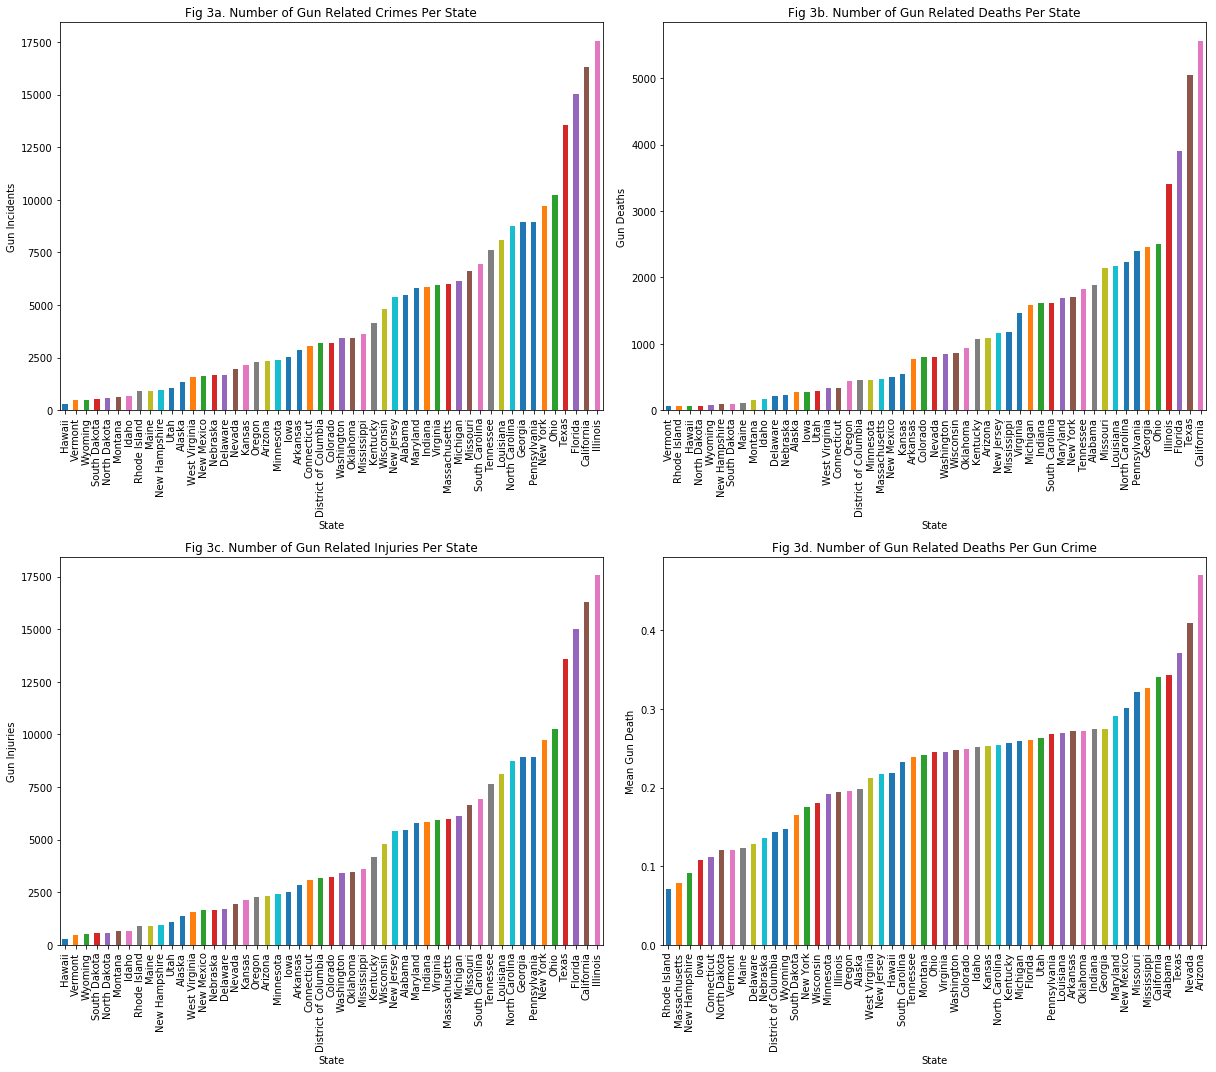

In [43]:
plt.figure(figsize=(17, 15))

plt.subplot(2, 2, 1)
df.groupby('state')['n_killed'].count().sort_values().plot(kind = 'bar')
plt.xlabel('State')
plt.ylabel('Gun Incidents')
plt.title('Fig 3a. Number of Gun Related Crimes Per State')

plt.subplot(2, 2, 2)
df.groupby('state')['n_killed'].sum().sort_values().plot(kind = 'bar')
plt.xlabel('State')
plt.ylabel('Gun Deaths')
plt.title('Fig 3b. Number of Gun Related Deaths Per State')

plt.subplot(2, 2, 3)
df.groupby('state')['n_injured'].count().sort_values().plot(kind = 'bar')
plt.xlabel('State')
plt.ylabel('Gun Injuries')
plt.title('Fig 3c. Number of Gun Related Injuries Per State')

plt.subplot(2, 2, 4)
df.groupby('state')['n_killed'].mean().sort_values().plot(kind = 'bar')
plt.xlabel('State')
plt.ylabel('Mean Gun Death')
plt.title('Fig 3d. Number of Gun Related Deaths Per Gun Crime')

plt.tight_layout()
plt.show()

These bar graphs certainly seem to clarify some of our earlier questions. From the looks of things, the more dangerous states seem to stand out to the right, with the safer states off to the left. Yet, each of these graphs tell a different story. Fig 3a tells us how many different incident occured within a state. The problem is that there can be plenty of incidents that result in no deaths or injuries. Certainly, having more incidents within your state means that there is probably more gun violence. But nothing is definitive. Take Arizona for example: in Fig 3a, its on the lower half, meaning that there have only been about 2,500 incidents in the last 5 years, or about 500 per year. Yet, Fig 3d shows us that Arizona has the higheset mean of gun deaths per incident, at about 45%. This means that from the 2,500 incidents that occured in Arizona, around 1,200 people died. Determining what makes a state "safe" or not really depends on a lot of factors. The only indication we might have is if a state is consistently found on the right or left side of these graphs, it can probably be more easily categorized.

There are two particular issues with the data when we look at these graphs that can have major repurcussions. Our dataframe does not include information such as state population, nor the size of each state. Relative to each other, that could mean that the data is skewed. For example, Hawaii is a small scarcely populated state, and it could have a very high rate of gun violence. The issue is that relative to the other 49 states, it has a low gun death and incident rate, simply by being smaller. This same logic could be applied to states such as Texas or California, which are larger states. As a result, we are still left pondering, where can we find a safe place?

## The Urban Effect

Looking at the graphs above, one thing becomes quite clear - stay away from Illinois. With the highest rate of incidents and over 4,000 gun deaths, it seems like the last place anyone would want to be. But further investigation indicates that this is not necessarily the result of what appears to be a deadly state, but rather the result of one particular location - Chicago. Our skewed data from the last section can now become a bit more clear as we go into further detail in regards to geography.

In [49]:
#Create a new data frame that is organized by city
df_cities = df.groupby('city_or_county')['n_killed','n_injured'].sum().reset_index()
#create a new value for each city - the "danger value", which is equivalent to the number of people killed times two, plus the
#number of gun related injuries
df_cities['danger_value'] = df_cities['n_injured'] + df_cities['n_killed']*2
#organize each city based on its danger value. Cities with a value lower than 200 are "safe", between 200 and 500 are "unsafe",
#between 500 and 1500 are "hazardous", between 1500 and 400 are "dangerous", and anything more than 4000 is considered "deadly".
df_cities['safe']= df_cities.loc[df_cities['danger_value']<200, 'danger_value']
df_cities['unsafe'] = df_cities.loc[(df_cities['danger_value']>=200) & (df_cities['danger_value'] < 500), 'danger_value']
df_cities['hazardous'] = df_cities.loc[(df_cities['danger_value']>=500) & (df_cities['danger_value'] < 1500), 'danger_value']
df_cities['dangerous'] =df_cities.loc[(df_cities['danger_value']>=1500) & (df_cities['danger_value'] < 4000), 'danger_value']
df_cities['deadly']=df_cities.loc[df_cities['danger_value']>=4000, 'danger_value']
df_cities

,city_or_county,n_killed,n_injured,gun_incidents,danger_value,safe,unsafe,hazardous,dangerous,deadly
0,Abbeville,7,20,NaN,34,34.0,NaN,NaN,NaN,NaN
1,Abbotsford,4,2,NaN,10,10.0,NaN,NaN,NaN,NaN
2,Abbott,2,0,NaN,4,4.0,NaN,NaN,NaN,NaN
3,Abbott Township,0,1,NaN,1,1.0,NaN,NaN,NaN,NaN
4,Abbottstown,0,0,NaN,0,0.0,NaN,NaN,NaN,NaN
5,Abercrombie,0,1,NaN,1,1.0,NaN,NaN,NaN,NaN
6,Aberdeen,17,38,NaN,72,72.0,NaN,NaN,NaN,NaN
7,Abilene,25,49,NaN,99,99.0,NaN,NaN,NaN,NaN
8,Abingdon,5,6,NaN,16,16.0,NaN,NaN,NaN,NaN
9,Abington,2,3,NaN,7,7.0,NaN,NaN,NaN,NaN


By creating this new dataframe, we're given new values to help quantify the safety of each city, based on the gun deaths and injuries. 

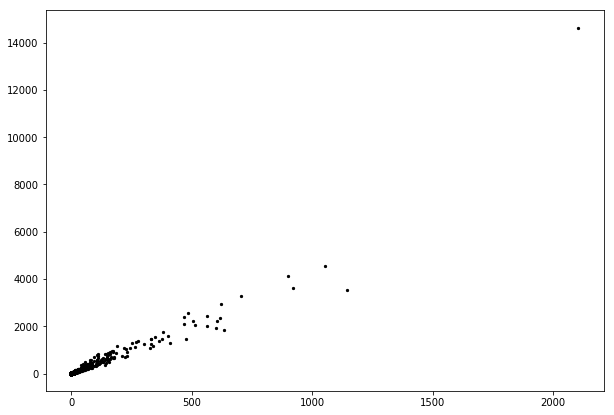

In [54]:
plt.figure(figsize = (10,7))
plt.scatter(x = df_cities['n_killed'], y = df_cities['danger_value'], color='black', s= 5)

plt.show()

In [30]:
city_type = ['safe', 'unsafe','hazardous', 'dangerous', 'deadly']
df_city_avg = pd.DataFrame(index= city_type)
df_city_avg['n_killed'] = [df_cities.groupby('safe')['n_killed'].sum().sum(),
                          df_cities.groupby('unsafe')['n_killed'].sum().sum(),
                          df_cities.groupby('hazardous')['n_killed'].sum().sum(),
                          df_cities.groupby('dangerous')['n_killed'].sum().sum(),
                          df_cities.groupby('deadly')['n_killed'].sum().sum()]
df_city_avg['n_injured'] = [df_cities.groupby('safe')['n_injured'].sum().sum(),
                          df_cities.groupby('unsafe')['n_injured'].sum().sum(),
                          df_cities.groupby('hazardous')['n_injured'].sum().sum(),
                          df_cities.groupby('dangerous')['n_injured'].sum().sum(),
                          df_cities.groupby('deadly')['n_injured'].sum().sum()]
df_city_avg['danger_value'] = [df_cities.groupby('safe')['danger_value'].sum().sum(),
                          df_cities.groupby('unsafe')['danger_value'].sum().sum(),
                          df_cities.groupby('hazardous')['danger_value'].sum().sum(),
                          df_cities.groupby('dangerous')['danger_value'].sum().sum(),
                          df_cities.groupby('deadly')['danger_value'].sum().sum()]
df_city_avg['total_cities'] = [df_cities['safe'].count(),
                              df_cities['unsafe'].count(),
                              df_cities['hazardous'].count(),
                              df_cities['dangerous'].count(),
                              df_cities['deadly'].count()]
df_city_avg['mean_deaths_per_city'] = df_city_avg['n_killed']/df_city_avg['total_cities']
df_city_avg['mean_injuries_per_city'] = df_city_avg['n_injured']/df_city_avg['total_cities']
df_city_avg['mean_danger_value_per_city'] = df_city_avg['danger_value']/df_city_avg['total_cities']
df_city_avg

,n_killed,n_injured,danger_value,total_cities,mean_deaths_per_city,mean_injuries_per_city,mean_danger_value_per_city
safe,27876,39152,94904,12734,2.189100,3.074603,7.452804
unsafe,6012,13563,25587,81,74.222222,167.444444,315.888889
hazardous,11970,29190,53130,62,193.064516,470.806452,856.935484
dangerous,10550,21317,42417,18,586.111111,1184.277778,2356.500000
deadly,4060,15180,23300,3,1353.333333,5060.000000,7766.666667


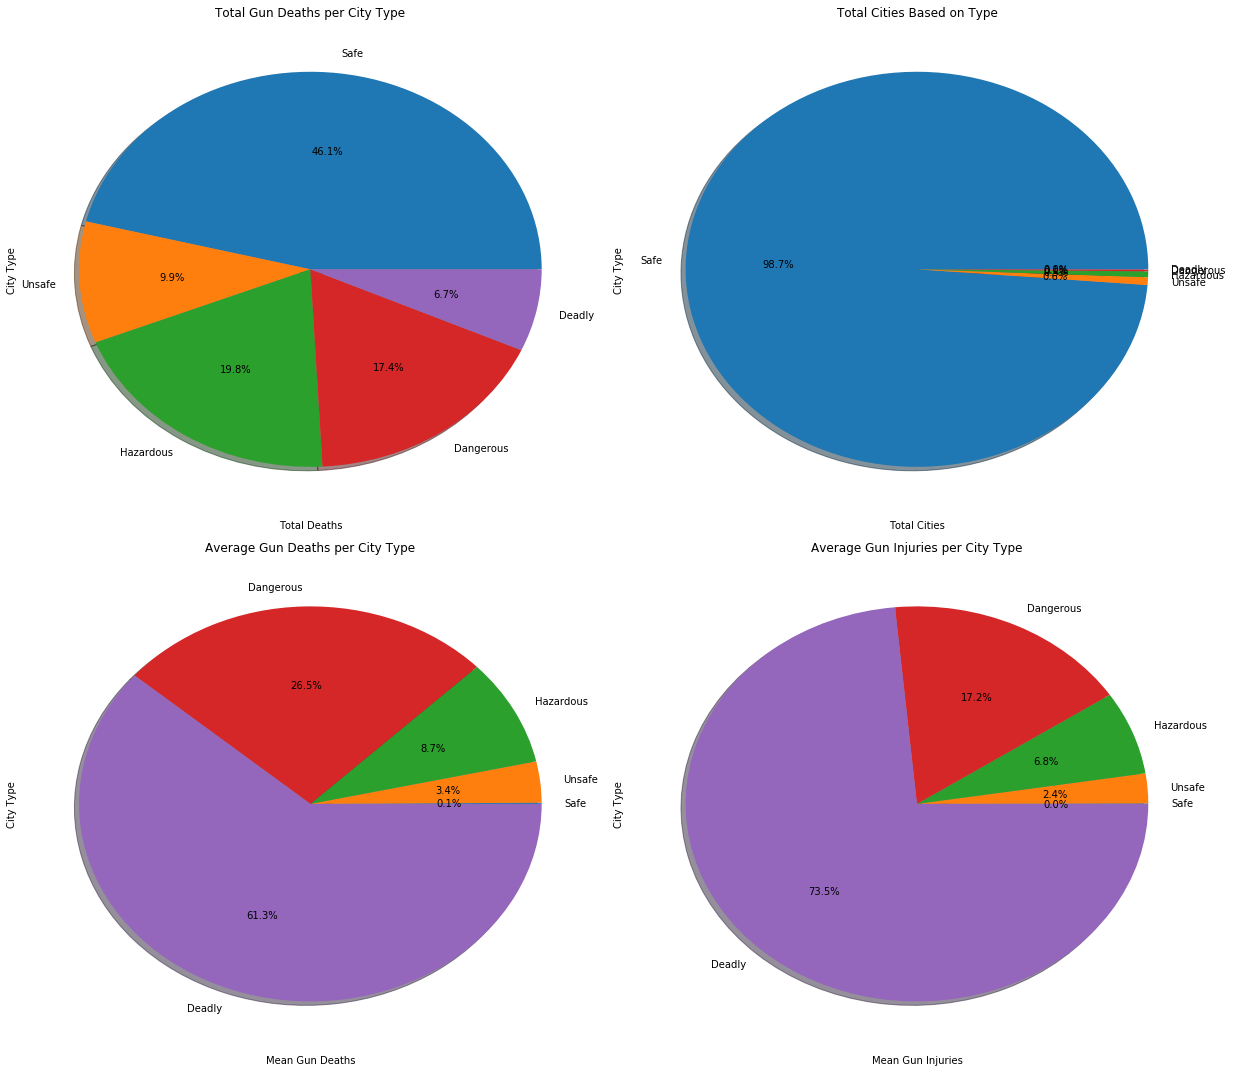

In [40]:
plt.figure(figsize=(17, 15))

labels = 'Safe', 'Unsafe', 'Hazardous', 'Dangerous', 'Deadly'
colors = 'blue', 'orange', 'green', 'red', 'purple'

plt.subplot(2, 2, 1)
plt.pie(df_city_avg['n_killed'], 
        labels= labels, 
        autopct='%1.1f%%',
        shadow = True)
plt.xlabel('Total Deaths')
plt.ylabel('City Type')
plt.title('Total Gun Deaths per City Type')


plt.subplot(2, 2, 2)
plt.pie(df_city_avg['total_cities'], 
        labels= labels, 
        autopct='%1.1f%%',
        shadow = True)
plt.xlabel('Total Cities')
plt.ylabel('City Type')
plt.title('Total Cities Based on Type')

plt.subplot(2, 2, 3)
plt.pie(df_city_avg['mean_deaths_per_city'], 
        labels= labels, 
        autopct='%1.1f%%',
        shadow = True)
plt.xlabel('Mean Gun Deaths')
plt.ylabel('City Type')
plt.title('Average Gun Deaths per City Type')

plt.subplot(2, 2, 4)
plt.pie(df_city_avg['mean_injuries_per_city'], 
        labels= labels, 
        autopct='%1.1f%%',
        shadow = True)
plt.xlabel('Mean Gun Injuries')
plt.ylabel('City Type')
plt.title('Average Gun Injuries per City Type')

plt.tight_layout()
plt.show()

In [50]:
sample1 = df_cities['safe'].dropna()
sample2 = df_cities['unsafe'].dropna()
sample3 = df_cities['hazardous'].dropna()
sample4 = df_cities['dangerous'].dropna()
sample5 = df_cities['deadly'].dropna()

print (scipy.stats.ttest_ind(sample1,sample2, equal_var = False))
print (scipy.stats.ttest_ind(sample1,sample3, equal_var = False))
print (scipy.stats.ttest_ind(sample1,sample4, equal_var = False))
print (scipy.stats.ttest_ind(sample1,sample5, equal_var = False))
print (scipy.stats.ttest_ind(sample2,sample3, equal_var = False))
print (scipy.stats.ttest_ind(sample2,sample4, equal_var = False))
print (scipy.stats.ttest_ind(sample2,sample5, equal_var = False))
print (scipy.stats.ttest_ind(sample3,sample4, equal_var = False))
print (scipy.stats.ttest_ind(sample3,sample5, equal_var = False))
print (scipy.stats.ttest_ind(sample4,sample5, equal_var = False))

Ttest_indResult(statistic=-31.617062485850948, pvalue=5.514177384903211e-47)
Ttest_indResult(statistic=-22.98115104887831, pvalue=9.789767106900864e-32)
Ttest_indResult(statistic=-15.957717841135906, pvalue=1.1550069118033852e-11)
Ttest_indResult(statistic=-2.258082649628349, pvalue=0.15249325096921434)
Ttest_indResult(statistic=-14.152687295993525, pvalue=3.6961022946365063e-22)
Ttest_indResult(statistic=-13.832103467611185, pvalue=9.843801856077379e-11)
Ttest_indResult(statistic=-2.1683129965250263, pvalue=0.16240439141707705)
Ttest_indResult(statistic=-9.880222070531074, pvalue=5.79973147825516e-09)
Ttest_indResult(statistic=-2.010750278118004, pvalue=0.1820188298594833)
Ttest_indResult(statistic=-1.5730213271612776, pvalue=0.2559079550241478)


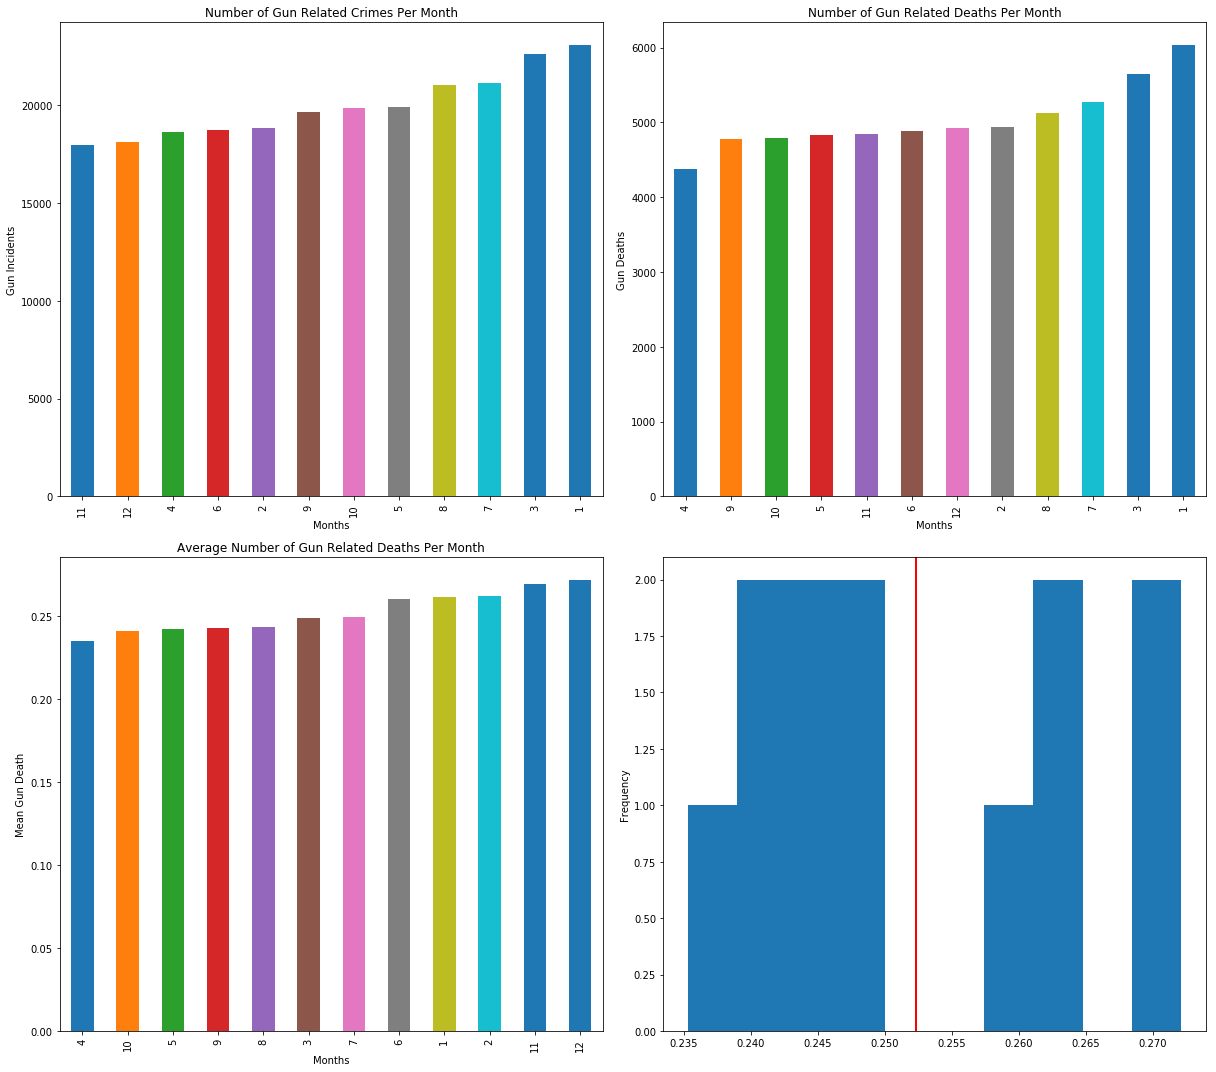

In [15]:
plt.figure(figsize=(17, 15))

plt.subplot(2, 2, 1)
df.groupby(by=df['date'].dt.month)['n_killed'].count().sort_values().plot(kind = 'bar')
plt.xlabel('Months')
plt.ylabel('Gun Incidents')
plt.title('Number of Gun Related Crimes Per Month')


plt.subplot(2, 2, 2)
df.groupby(by=df['date'].dt.month)['n_killed'].sum().sort_values().plot(kind = 'bar')
plt.xlabel('Months')
plt.ylabel('Gun Deaths')
plt.title('Number of Gun Related Deaths Per Month')

plt.subplot(2, 2, 3)
df.groupby(by=df['date'].dt.month)['n_killed'].mean().sort_values().plot(kind = 'bar')
plt.xlabel('Months')
plt.ylabel('Mean Gun Death')
plt.title('Average Number of Gun Related Deaths Per Month')

plt.subplot(2,2,4)
df.groupby(by=df['date'].dt.month)['n_killed'].mean().sort_values().plot(kind = 'hist')
plt.axvline(df['n_killed'].mean(), color='r', linestyle='solid', linewidth=2)
#plt.axvline(df['n_killed'].mean() + df['n_killed'].std(), color='r', linestyle='dashed', linewidth=2)
#plt.axvline(df['n_killed'].mean()- df['n_killed'].std(), color='r', linestyle='dashed', linewidth=2)

plt.tight_layout()
plt.show()

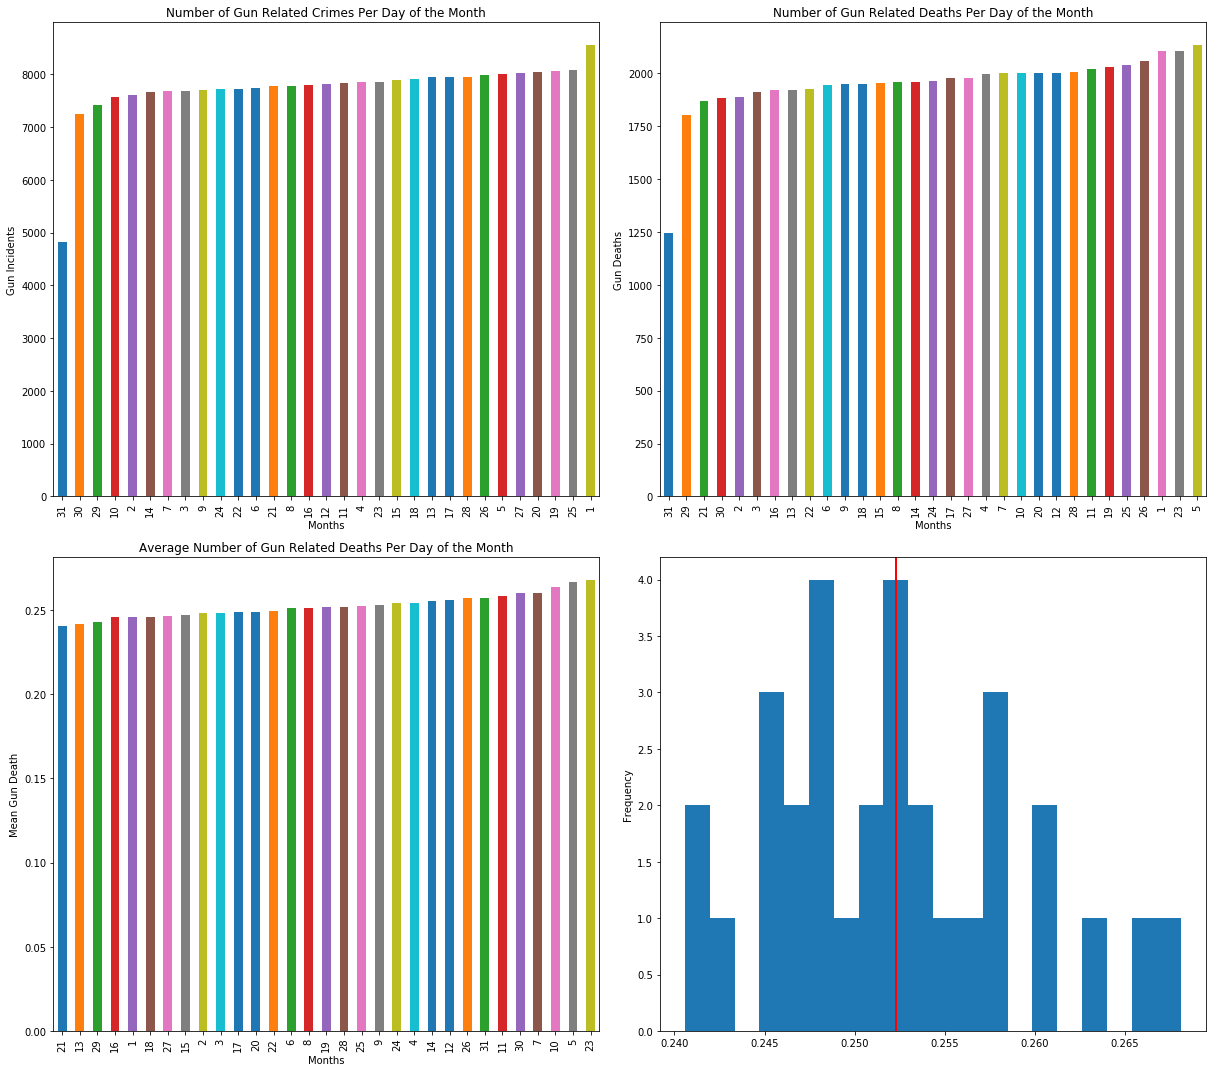

In [190]:
plt.figure(figsize=(17, 15))

plt.subplot(2, 2, 1)
df.groupby(by=df['date'].dt.day)['n_killed'].count().sort_values().plot(kind = 'bar')
plt.xlabel('Months')
plt.ylabel('Gun Incidents')
plt.title('Number of Gun Related Crimes Per Day of the Month')


plt.subplot(2, 2, 2)
df.groupby(by=df['date'].dt.day)['n_killed'].sum().sort_values().plot(kind = 'bar')
plt.xlabel('Months')
plt.ylabel('Gun Deaths')
plt.title('Number of Gun Related Deaths Per Day of the Month')

plt.subplot(2, 2, 3)
df.groupby(by=df['date'].dt.day)['n_killed'].mean().sort_values().plot(kind = 'bar')
plt.xlabel('Months')
plt.ylabel('Mean Gun Death')
plt.title('Average Number of Gun Related Deaths Per Day of the Month')

plt.subplot(2,2,4)
df.groupby(by=df['date'].dt.day)['n_killed'].mean().sort_values().plot(kind = 'hist', bins = 20)
plt.axvline(df['n_killed'].mean(), color='r', linestyle='solid', linewidth=2)
#plt.axvline(df['n_killed'].mean() + df['n_killed'].std(), color='r', linestyle='dashed', linewidth=2)
#plt.axvline(df['n_killed'].mean()- df['n_killed'].std(), color='r', linestyle='dashed', linewidth=2)

plt.tight_layout()
plt.show()

<Figure size 1080x360 with 0 Axes>

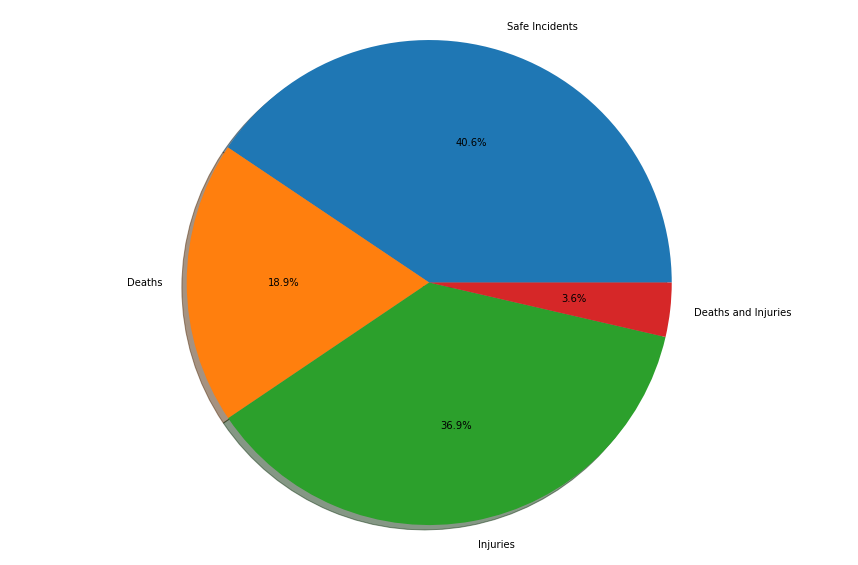

In [45]:
fig1, ax = plt.subplots(figsize= (15,10))
ax.pie([df['safe_incident'].sum(), df['death_only'].sum(), df['injury_only'].sum(), df['death_and_injury'].sum()], 
        labels= ['Safe Incidents', 'Deaths', 'Injuries', 'Deaths and Injuries'], 
        autopct='%1.1f%%',
        shadow=True)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

<Figure size 1080x360 with 0 Axes>

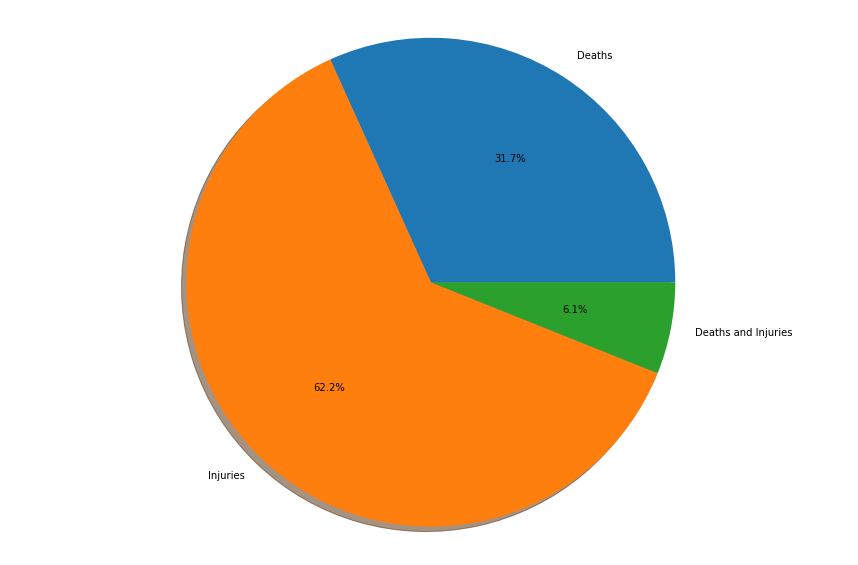

In [48]:
plt.figure(figsize= (15,5))
fig1, ax = plt.subplots(figsize= (15,10))
ax.pie([df['death_only'].sum(), df['injury_only'].sum(), df['death_and_injury'].sum()], 
        labels= ['Deaths', 'Injuries', 'Deaths and Injuries'], 
        autopct='%1.1f%%',
        shadow=True)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [49]:
df_only_deadly = df[df['safe_incident'] != 1]
df_only_deadly

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district,safe_incident,death_only,injury_only,death_and_injury
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN,NaN,NaN,1.0,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0,NaN,NaN,NaN,1.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0,NaN,NaN,NaN,1.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0,NaN,1.0,NaN,NaN
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0,NaN,NaN,NaN,1.0
5,478948,2013-01-07,Oklahoma,Tulsa,6000 block of South Owasso,4,0,http://www.gunviolencearchive.org/incident/478948,http://usnews.nbcnews.com/_news/2013/01/07/163...,False,...,NaN,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.kjrh.com/news/local-news/4-found-sh...,72.0,11.0,NaN,1.0,NaN,NaN
6,479363,2013-01-19,New Mexico,Albuquerque,2806 Long Lane,5,0,http://www.gunviolencearchive.org/incident/479363,http://hinterlandgazette.com/2013/01/pastor-gr...,False,...,5::Family,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.cbsnews.com/news/nehemiah-gringo-ca...,10.0,14.0,NaN,1.0,NaN,NaN
7,479374,2013-01-21,Louisiana,New Orleans,LaSalle Street and Martin Luther King Jr. Boul...,0,5,http://www.gunviolencearchive.org/incident/479374,http://www.nola.com/crime/index.ssf/2013/01/no...,False,...,NaN,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.huffingtonpost.com/2013/01/21/new-o...,93.0,5.0,NaN,NaN,1.0,NaN
8,479389,2013-01-21,California,Brentwood,1100 block of Breton Drive,0,4,http://www.gunviolencearchive.org/incident/479389,http://sanfrancisco.cbslocal.com/2013/01/22/4-...,False,...,NaN,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.contracostatimes.com/ci_22426767/br...,11.0,7.0,NaN,NaN,1.0,NaN
9,492151,2013-01-23,Maryland,Baltimore,1500 block of W. Fayette St.,1,6,http://www.gunviolencearchive.org/incident/492151,http://www.abc2news.com/news/crime-checker/bal...,False,...,NaN,0::Killed||1::Injured||2::Injured||3::Injured|...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://articles.baltimoresun.com/2013-08-25/ne...,NaN,44.0,NaN,NaN,NaN,1.0


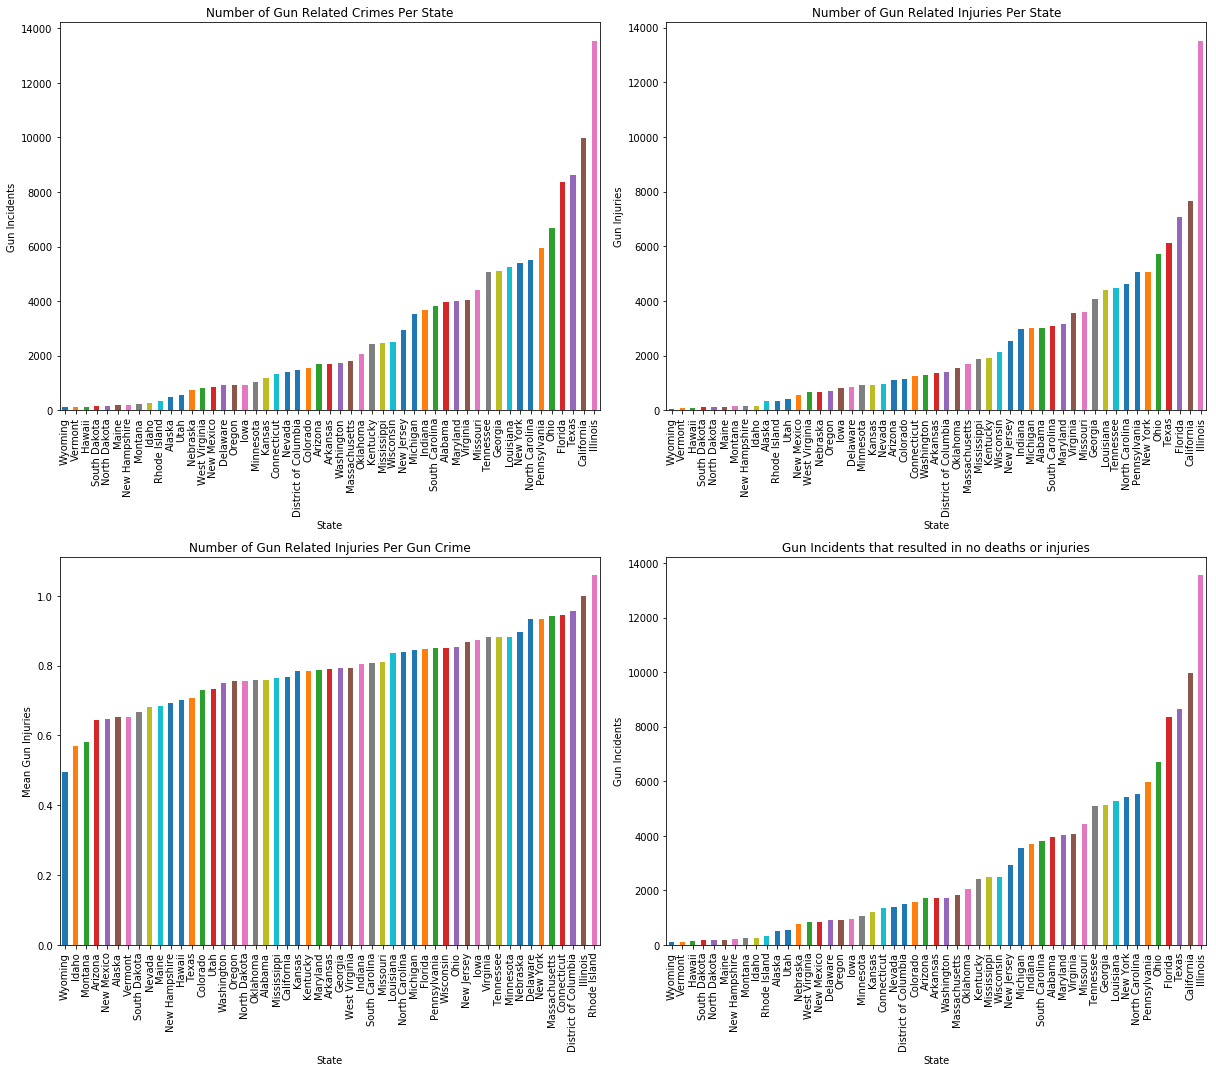

In [50]:
plt.figure(figsize=(17, 15))

plt.subplot(2, 2, 1)
df_only_deadly.groupby('state')['n_injured'].count().sort_values().plot(kind = 'bar')
plt.xlabel('State')
plt.ylabel('Gun Incidents')
plt.title('Number of Gun Related Crimes Per State')


plt.subplot(2, 2, 2)
df_only_deadly.groupby('state')['n_injured'].sum().sort_values().plot(kind = 'bar')
plt.xlabel('State')
plt.ylabel('Gun Injuries')
plt.title('Number of Gun Related Injuries Per State')

plt.subplot(2, 2, 3)
df_only_deadly.groupby('state')['n_injured'].mean().sort_values().plot(kind = 'bar')
plt.xlabel('State')
plt.ylabel('Mean Gun Injuries')
plt.title('Number of Gun Related Injuries Per Gun Crime')

plt.subplot(2, 2, 4)
df_only_deadly.groupby('state')['n_killed'].count().sort_values().plot(kind = 'bar')
plt.xlabel('State')
plt.ylabel('Gun Incidents')
plt.title('Gun Incidents that resulted in no deaths or injuries')


plt.tight_layout()
plt.show()